<a href="https://colab.research.google.com/github/Suryaprasadindra/SentimentAnalysi/blob/main/TwitterSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing necessary libraries**

### Introduction

Twitter sentiment analysis is the process of extracting and analyzing emotions, opinions, and attitudes expressed in tweets. With millions of tweets shared daily, Twitter has become a valuable platform for understanding public opinion on various topics, including products, brands, events, and social issues. Sentiment analysis helps classify these tweets into categories such as positive, negative, or neutral, providing actionable insights for decision-making.

The significance of sentiment analysis lies in its applications across industries. Businesses use it for brand monitoring, customer feedback analysis, and improving marketing strategies. Governments and organizations analyze sentiment to understand public opinion and predict trends. In addition, it is widely used in research for understanding social dynamics and behaviors.

This study focuses on developing a machine learning model for Twitter sentiment analysis. The goal is to classify tweets accurately into positive and negative sentiments while identifying patterns and trends in public opinion. The results of this analysis can provide valuable insights for stakeholders to make data-driven decisions.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# **Data Preprocessing**

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

**Load the datset**

In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon[1].csv',encoding='ISO-8859-1')

**Checking shape**

In [ ]:
df.shape

(1599999, 6)

In [ ]:
df.head()

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


**Naming the columns**

In [ ]:
coulumn_names = ['target','id','date','flag','user','text']

In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon[1].csv', names = coulumn_names ,encoding='ISO-8859-1')

In [ ]:
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


**checking null values**

In [ ]:
df.isnull().sum()

,0
target,0
id,0
date,0
flag,0
user,0
text,0


**checking duplicate values**

In [ ]:
df.duplicated().sum()

0

**checking counts**

In [ ]:
df.value_counts('target')

,count
target,
0,800000
4,800000


**Converting 4 to 1, in dataset target 4 is there.**

In [ ]:
df.replace({'target':{4:1}},inplace=True)

In [ ]:
df.value_counts('target')

,count
target,
0,800000
1,800000


0 means negative tweet

1 means positive tweet

**Stemming**

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ', content)   # removing all except a-zA-Z
  stemmed_content = stemmed_content.lower()  # lowering the text
  stemmed_content = stemmed_content.split()  # split the words
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # apply stemming if it is not in stopwords
  stemmed_content = ' '.join(stemmed_content) # joing content back

  return stemmed_content

In [ ]:
df['stemmed_text'] = df['text'].apply(stemming) #applying stemming function on text column in dataframe

In [ ]:
df.head()

,target,id,date,flag,user,text,stemmed_text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [ ]:
print(df['stemmed_text'][2]) # printing 3rd row to check stemmed text

kenichan dive mani time ball manag save rest go bound


**seperating independent and dependent variable**

In [ ]:
X = df['stemmed_text'].values
Y = df['target'].values

**splitting the dataset to training and testing dataset**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify=Y, random_state=2)

# Stratify means equal distribution of classes (0,1) from target-samples to train and test

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(1600000,) (1120000,) (480000,)


In [ ]:
print(X_train)

['finish read book second time'
 'tommygun back action lunch today best watchout bday boy take'
 'kata shall listen later' ... 'jedbramwel thank teddytuesday'
 'mtv movi award hope rob win realli care twilight win best movi rob win'
 'love wake folger bad voic deeper']


In [ ]:
print(Y_train)

[1 1 1 ... 1 1 0]


**CONVERTING TEXT TO NUMERICAL**

In [ ]:
 vectorizing = TfidfVectorizer()

In [ ]:
X_train = vectorizing.fit_transform(X_train)
X_test = vectorizing.transform(X_test)

In [ ]:
print(X_train)

  (0, 121348)	0.44599875194306554
  (0, 306319)	0.4371164314704369
  (0, 43969)	0.4748653389926461
  (0, 328004)	0.5314491135690684
  (0, 374778)	0.31949818170660904
  (1, 377777)	0.5390797727604117
  (1, 28528)	0.16997429420382654
  (1, 2941)	0.3329517305729672
  (1, 224362)	0.2471619420602169
  (1, 376966)	0.16230856596272636
  (1, 36162)	0.21760975021723117
  (1, 400139)	0.5008486447803013
  (1, 32222)	0.2885646935506797
  (1, 45367)	0.24454930105105105
  (1, 360908)	0.20232270128356877
  (2, 192775)	0.7270515839609044
  (2, 331146)	0.4577243030925928
  (2, 217307)	0.3586212341678004
  (2, 209149)	0.3650688524406097
  (3, 175917)	0.5797213273864051
  (3, 139076)	0.25759117714273316
  (3, 366377)	0.4018889828996008
  (3, 344001)	0.3565976148233519
  (3, 114004)	0.3165169852577187
  (3, 381278)	0.3044716859774938
  :	:
  (1119996, 41689)	0.2988684615709349
  (1119996, 21512)	0.23572264244863686
  (1119996, 382366)	0.2544848779868633
  (1119996, 295570)	0.33902005717805955
  (1119996, 

In [ ]:
print(X_test)

  (0, 46696)	0.3105296872456904
  (0, 86927)	0.33413484518869224
  (0, 121198)	0.2668513552052889
  (0, 143634)	0.6303950980554028
  (0, 235076)	0.29762268984383516
  (0, 345122)	0.24201085278417414
  (0, 357350)	0.2678444483614686
  (0, 372248)	0.2111379764309065
  (0, 400455)	0.24464092290138587
  (1, 121102)	0.36962717098251946
  (1, 156589)	0.48451365961749343
  (1, 360939)	0.5151309759331816
  (1, 383626)	0.43305234092570793
  (1, 390597)	0.41919925544830766
  (2, 303665)	1.0
  (3, 28528)	0.2635724776921008
  (3, 39958)	0.6085945392762492
  (3, 72122)	0.26777644261468114
  (3, 156926)	0.2493726437719803
  (3, 281474)	0.6528792362184421
  (4, 180954)	0.5598634315653229
  (4, 189400)	0.463921117899177
  (4, 215156)	0.21842711142276236
  (4, 220281)	0.3037998272593176
  (4, 220487)	0.25816571428786494
  :	:
  (479996, 81006)	0.643199214486612
  (479996, 85937)	0.12458241685151497
  (479996, 112760)	0.2473188961426422
  (479996, 118268)	0.25120743997882045
  (479996, 146137)	0.1691198

**Logistic Regression**

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

**Accuracy Score**

In [ ]:
X_train_prediction = model.predict(X_train)
training_accuracy = accuracy_score(Y_train ,X_train_prediction)

In [ ]:
print('Accuracy score of the training data : ', training_accuracy)

Accuracy score of the training data :  0.8039133928571428


In [ ]:
y_pred = model.predict(X_test)
testing_accuracy = accuracy_score(Y_test ,y_pred)

In [ ]:
print('Accuracy score of the testing data : ', testing_accuracy)

Accuracy score of the testing data :  0.77708125


**Confusion Matrix and Classification report**

In [ ]:
# Create the confusion matrix
cm = confusion_matrix(Y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:",cm)

# Print classification report
print(classification_report(Y_test, y_pred))

Confusion Matrix: [[181748  58252]
 [ 48749 191251]]
              precision    recall  f1-score   support

           0       0.79      0.76      0.77    240000
           1       0.77      0.80      0.78    240000

    accuracy                           0.78    480000
   macro avg       0.78      0.78      0.78    480000
weighted avg       0.78      0.78      0.78    480000



**Confusion matrix diagram**

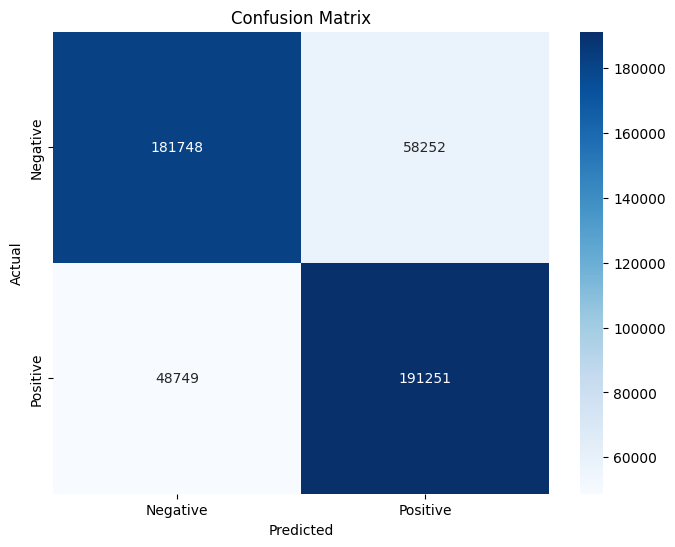

In [ ]:
#Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import pickle

file_name = 'twitter_trained_model.pkl'

pickle.dump(model, open(file_name, 'wb'))

In [ ]:
from google.colab import files
files.download('twitter_trained_model.pkl')  # Download the saved model

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Conclusion

The model has an overall accuracy of **78%**, which shows decent performance. It predicts both negative and positive classes fairly well, with F1-scores of **0.77** and **0.78**, respectively. However, there is room for improvement in reducing false positives (**58,252**) and false negatives (**48,749**).

The recall for the positive class (**0.80**) is slightly better than for the negative class (**0.76**), meaning the model is better at identifying positives but sometimes misclassifies negatives as positives. The precision values for both classes are close (**0.79** for negatives and **0.77** for positives), showing that the model is balanced in its predictions.

To improve performance, the model could benefit from hyperparameter tuning, feature selection, or handling class imbalance. Overall, the model performs reasonably well but could be optimized further for better results.